# Evaluation Project -
Global Power Plant Database
Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database

The database includes the following indicators:

    `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
    `country_long` (text): longer form of the country designation
    `name` (text): name or title of the power plant, generally in Romanized form
    `gppd_idnr` (text): 10 or 12 character identifier for the power plant
    `capacity_mw` (number): electrical generating capacity in megawatts
    `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
    `primary_fuel` (text): energy source used in primary electricity generation or export
    `other_fuel1` (text): energy source used in electricity generation or export
    `other_fuel2` (text): energy source used in electricity generation or export
    `other_fuel3` (text): energy source used in electricity generation or export
     `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
    `owner` (text): majority shareholder of the power plant, generally in Romanized form
    `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
    `url` (text): web document corresponding to the `source` field
    `geolocation_source` (text): attribution for geolocation information
    `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
    `year_of_capacity_data` (number): year the capacity information was reported
    `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
    `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
    `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
    `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
    `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
    `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
    `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
    `generation_data_source` (text): attribution for the reported generation information
    `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
    `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
    `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
    `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
    `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
    'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
    `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
    `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
    `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
    `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       


    
wepp_id and estimated_generation_gwh have no values present. 



While other fuel3 doesn't have any values, other_fuel 3 are alternative fuel present.Hence it's okay for the feature to be empty.

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object



    commissioning year and year of capacity data are of float datatype, needs to be int.

In [7]:
(df.loc[0:]==" ").sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
other_fuel2                 0
other_fuel3                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
wepp_id                     0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source      0
estimated_generation_gwh    0
dtype: int64

In [8]:
(df.loc[0:]==0).sum()

country                      0
country_long                 0
name                         0
gppd_idnr                    0
capacity_mw                  1
latitude                     0
longitude                    0
primary_fuel                 0
other_fuel1                  0
other_fuel2                  0
other_fuel3                  0
commissioning_year           0
owner                        0
source                       0
url                          0
geolocation_source           0
wepp_id                      0
year_of_capacity_data        0
generation_gwh_2013         21
generation_gwh_2014         28
generation_gwh_2015         28
generation_gwh_2016         31
generation_gwh_2017         33
generation_data_source       0
estimated_generation_gwh     0
dtype: int64

In [9]:
df.loc[df["capacity_mw"]==0]

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
830,IND,India,Tata BP - Electronics City Solar Panel Plant,WRI1026216,0.0,12.8491,77.6752,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df["primary_fuel"].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [11]:
df["other_fuel1"].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [12]:
df["other_fuel3"].unique()

array([nan])

In [13]:
df["country"].unique()

array(['IND'], dtype=object)

In [14]:
df["country_long"].unique()

array(['India'], dtype=object)

In [15]:
df["name"].value_counts()

INDIRA SAGAR                           1
MURBAD PLANT                           1
Relaxo Footwear Kui Inda Wind Farm     1
DHOLPUR                                1
Mandrup - Giriraj Solar Power Plant    1
                                      ..
KOJIKODE DG                            1
M.A.P.P.                               1
Dhank - Aravali Solar Power Plant      1
PENCH                                  1
ATHANI SUGAR                           1
Name: name, Length: 908, dtype: int64

In [16]:
df["geolocation_source"].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [17]:
df["owner"].value_counts()

Sterling Agro Industries ltd.               4
Acc Acc ltd                                 4
Jk Cement ltd                               4
Government of India                         3
Tata Power Solar Systems Limited (TPREL)    3
                                           ..
National Ltd nfl)                           1
Madras Cement Limited                       1
Surana Industries ltd                       1
Mula Ssk ltd                                1
KVK Energy Ventures Ltd                     1
Name: owner, Length: 280, dtype: int64

In [18]:
df["commissioning_year"].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 2013., 1962., 1993., 1997.,
       1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983.,
       1981., 1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955.,
       2018., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [19]:
import statistics as stats
df["commissioning_year"]=df["commissioning_year"].fillna(stats.mode(df["commissioning_year"]))

In [20]:
df["commissioning_year"].unique()

array([2011., 2013., 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1998., 1977., 1980.,
       2003., 1984., 1973., 1996., 1991., 2002., 2001., 2006., 2007.,
       1988., 2012., 1968., 1964., 2016., 1962., 1993., 1997., 1999.,
       1994., 1975., 1992., 1972., 1979., 1967., 1995., 1983., 1981.,
       1959., 1961., 1957., 1978., 1976., 1963., 1971., 1955., 2018.,
       2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982., 1937.,
       1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927., 1974.,
       1953.])

In [21]:
df["commissioning_year"]=df["commissioning_year"].astype(int)  #changing the data type

In [22]:
df["year_of_capacity_data"]=df["year_of_capacity_data"].fillna(stats.mode(df["year_of_capacity_data"]))

In [23]:
df["year_of_capacity_data"]=df["year_of_capacity_data"].astype(int)

In [24]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year            int32
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data         int32
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [25]:
df["latitude"]=df["latitude"].fillna(np.mean(df["latitude"]))
df["longitude"]=df["longitude"].fillna(np.mean(df["longitude"]))

In [26]:
df["other_fuel1"]=df["other_fuel1"].replace(np.nan,"no fuel")  #replacing nan values with "no fuel" by assuming nan values mean no alternative fuels
df["other_fuel2"]=df["other_fuel2"].replace(np.nan,"no fuel")

In [27]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                   0
other_fuel2                   0
other_fuel3                 908
commissioning_year            0
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data         0
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [28]:
df["generation_data_source"].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [29]:
df["generation_gwh_2017"]=df["generation_gwh_2017"].fillna(np.mean(df["generation_gwh_2017"]))
df["generation_gwh_2016"]=df["generation_gwh_2016"].fillna(np.mean(df["generation_gwh_2016"]))
df["generation_gwh_2015"]=df["generation_gwh_2015"].fillna(np.mean(df["generation_gwh_2015"]))
df["generation_gwh_2014"]=df["generation_gwh_2014"].fillna(np.mean(df["generation_gwh_2014"]))
df["generation_gwh_2013"]=df["generation_gwh_2013"].fillna(np.mean(df["generation_gwh_2013"]))

In [30]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,no fuel,no fuel,...,National Renewable Energy Laboratory,NaN,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,no fuel,no fuel,...,WRI,NaN,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,no fuel,no fuel,...,WRI,NaN,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,no fuel,no fuel,...,WRI,NaN,2018,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,no fuel,...,WRI,NaN,2018,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,no fuel,...,WRI,NaN,2018,2304.059202,2420.393316,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,no fuel,no fuel,...,Industry About,NaN,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,no fuel,no fuel,...,WRI,NaN,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,no fuel,no fuel,...,WRI,NaN,2018,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN,NaN


In [31]:
df=df.drop(["name","gppd_idnr"],axis=1)  #all unique present
df=df.drop(["country","country_long","year_of_capacity_data"],axis=1) # contains the same value
df=df.drop(["wepp_id","estimated_generation_gwh","other_fuel3"],axis=1)  #all nan values

In [32]:
df=df.drop(["generation_data_source"],axis=1) #only values present are Central Electricity Authority and nan

In [33]:
df["owner"]=df["owner"].replace(np.nan,"not mentioned")

In [34]:
df["geolocation_source"]=df["geolocation_source"].fillna(stats.mode(df["geolocation_source"]))

In [35]:
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,Solar,no fuel,no fuel,2011,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,Coal,no fuel,no fuel,2013,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,Wind,no fuel,no fuel,2013,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,Gas,no fuel,no fuel,2004,not mentioned,Central Electricity Authority,http://www.cea.nic.in/,WRI,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,Coal,Oil,no fuel,2015,not mentioned,Central Electricity Authority,http://www.cea.nic.in/,WRI,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,Coal,Oil,no fuel,2016,not mentioned,Central Electricity Authority,http://www.cea.nic.in/,WRI,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,Solar,no fuel,no fuel,2013,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,Wind,no fuel,no fuel,2013,not mentioned,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,Coal,no fuel,no fuel,2013,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


# EDA

Text(0.5, 1.0, 'Primary fuel')

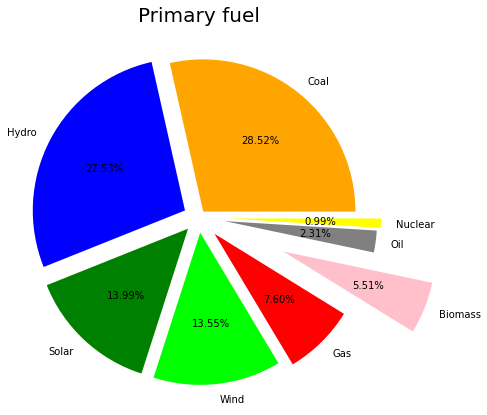

In [36]:
count=df["primary_fuel"].value_counts()
explode = [0.05, 0.1,0.1,0.1,0.15,0.6,0.175,0.2]
plt.figure(figsize=(7,7))
plt.pie(data=count,x=count.values,labels=count.index,colors=["orange","blue","green","lime","red","pink","grey","yellow"],autopct="%0.2f%%",explode=explode)
plt.title("Primary fuel",size=20)


    
1. Coal is the most generated primary fuel. 


2. Nuclear is the least generated primary fuel.


3. Coal and Hydro account for over 56% of primary fuel.

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

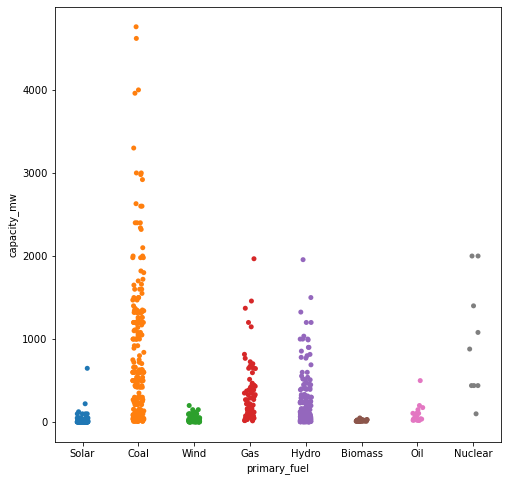

In [37]:
plt.subplots(figsize=(8,8))
sns.stripplot(x="primary_fuel",y="capacity_mw",data=df)


    
1. Coal generates the most power in mega watts (mw).


2. Nuclear having the least presence in terms of count in the plot. 


3. Biomass contributes the least in terms of capacity in mw.

<AxesSubplot:xlabel='primary_fuel', ylabel='Count'>

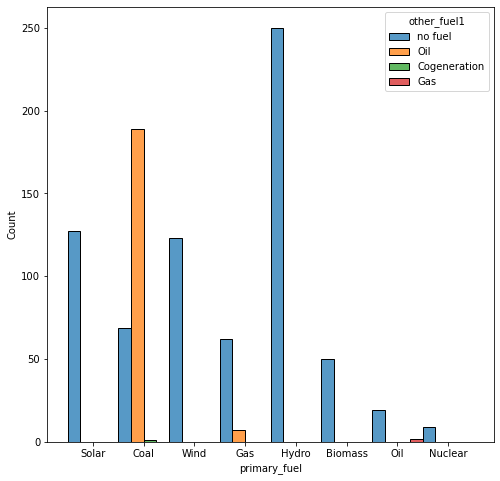

In [38]:
plt.subplots(figsize=(8,8))
sns.histplot(df,x="primary_fuel",stat="count",bins="auto",hue="other_fuel1",multiple="dodge")


    
1. When coal is the primary fuel, other fuels (alternatives) have been oil and Congeneration. 


2. When nuclear is the primary fuel, other fuel has been Gas. 


3. When the primary fuel has been gas, other fuel generates is oil.


4. Whereas for solar,wind,hydro,biomass an oil as primary fuel no alterntaive fuels have been generated. 

<AxesSubplot:xlabel='primary_fuel', ylabel='Count'>

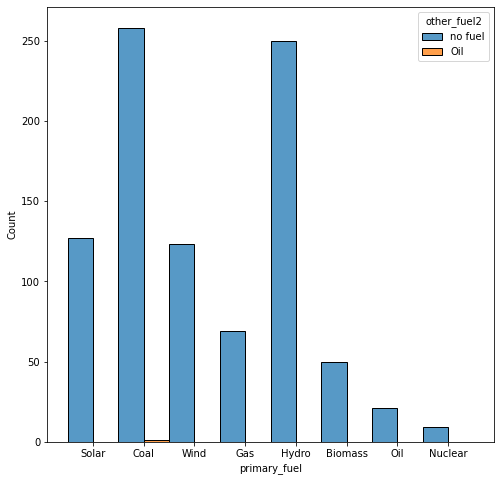

In [39]:
plt.subplots(figsize=(8,8))
sns.histplot(df,x="primary_fuel",stat="count",bins="auto",hue="other_fuel2",multiple="dodge")


    Coal is the only primary fuel where oil as other fuel can be generated.

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

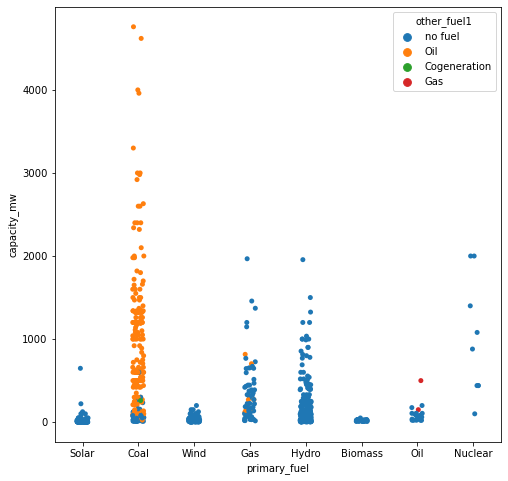

In [40]:
plt.subplots(figsize=(8,8))
sns.stripplot(x="primary_fuel",y="capacity_mw",data=df,hue="other_fuel1")


    
Coal as primary fuel and oil as other fuel has contributed the most to capacity. 


<AxesSubplot:xlabel='primary_fuel', ylabel='commissioning_year'>

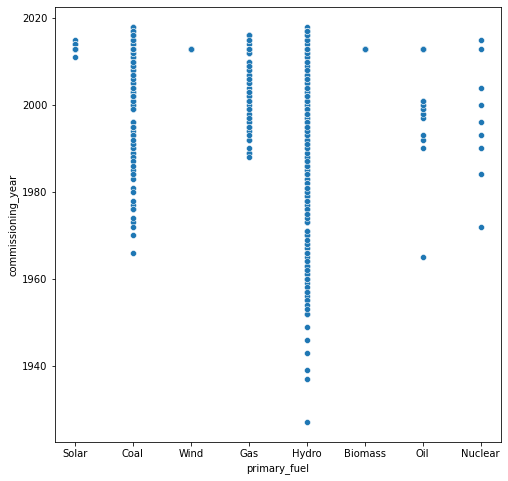

In [41]:
plt.subplots(figsize=(8,8))
sns.scatterplot(x="primary_fuel",y="commissioning_year",data=df)


    
1. Solar power plants have only begun closer to the year 2020.



2. Hydro power plant seems to be the oldest plants to generate power.


3. Coal power plants have begun around the year 1960.


4. Wind and biomass dont have alot of plants and these have begun in early 2010s.

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

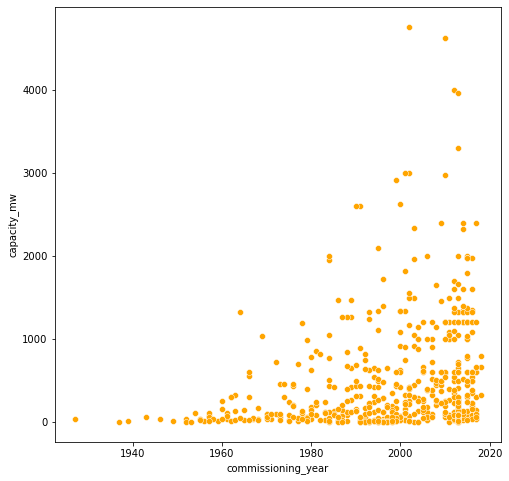

In [42]:
plt.subplots(figsize=(8,8))
sns.scatterplot(x="commissioning_year",y="capacity_mw",data=df,color="orange")


    
 Over the years plants have managed to increase the capacity of the plant drastically.

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

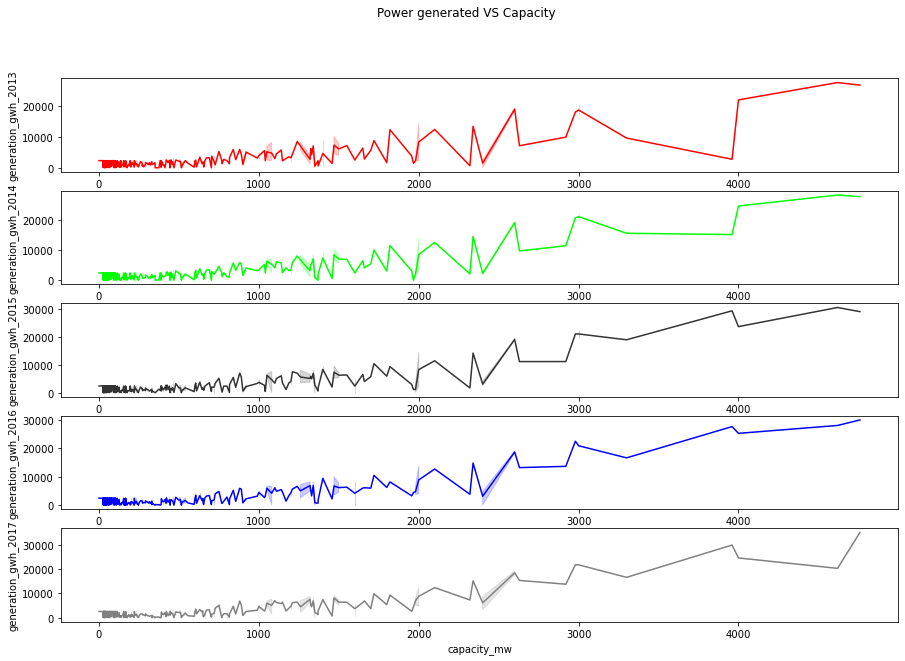

In [43]:
fig, axes = plt.subplots(5, 1, figsize=(15, 10), sharex=False)
fig.suptitle("Power generated VS Capacity")

sns.lineplot(y=df["generation_gwh_2013"],x=df["capacity_mw"],ax=axes[0],color="red")

sns.lineplot(y=df["generation_gwh_2014"],x=df["capacity_mw"],ax=axes[1],color="lime")

sns.lineplot(y=df["generation_gwh_2015"],x=df["capacity_mw"],ax=axes[2],color="0.2")

sns.lineplot(y=df["generation_gwh_2016"],x=df["capacity_mw"],ax=axes[3],color="blue")

sns.lineplot(y=df["generation_gwh_2017"],x=df["capacity_mw"],ax=axes[4],color="0.5")

Observations:
    
1. Across years a similr trend is observed between electricity generated and capacity of the plant. 


2. In the year 2013, there is a significant drop in electricity generated at capacity 4000 mw when compared with the consecutive years.


3. While in the year 2015, there is a steep increase in the electricity generated at capacity 4000 mw when compared with the consecutive years.

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

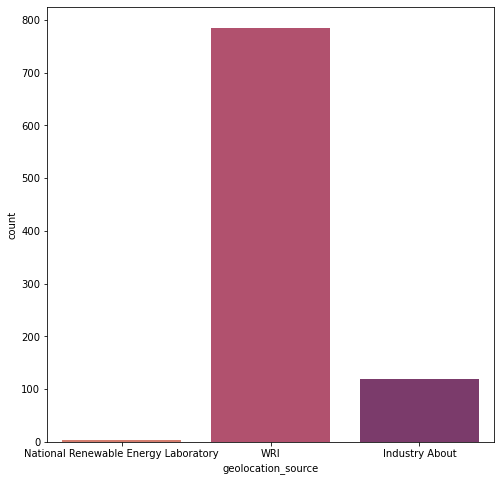

In [44]:
plt.subplots(figsize=(8,8))
sns.countplot(x="geolocation_source",data=df,palette="flare")


    WRI is from where the most geolocation_source is collected.

In [45]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
other_fuel2             object
commissioning_year       int32
owner                   object
source                  object
url                     object
geolocation_source      object
generation_gwh_2013    float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
dtype: object

# Label Encoder

In [46]:
import sklearn 
from sklearn.preprocessing import LabelEncoder 

lencode=LabelEncoder()
df["primary_fuel"]=lencode.fit_transform(df["primary_fuel"])
df["other_fuel1"]=lencode.fit_transform(df["other_fuel1"])
df["other_fuel2"]=lencode.fit_transform(df["other_fuel2"])
df["owner"]=lencode.fit_transform(df["owner"])
df["source"]=lencode.fit_transform(df["source"])
df["url"]=lencode.fit_transform(df["url"])
df["geolocation_source"]=lencode.fit_transform(df["geolocation_source"])
df["commissioning_year"]=lencode.fit_transform(df["commissioning_year"])
df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,3,1,65,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,3,1,67,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,3,1,67,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,3,1,58,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,1,69,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,1,70,280,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,3,1,67,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,7,3,1,67,280,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1,3,1,67,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [47]:
round(df.corr(),4)

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
capacity_mw,1.0000,0.0498,0.1971,-0.3778,-0.5985,0.0035,0.0109,0.3037,-0.2417,-0.2432,0.2047,0.6678,0.7054,0.7221,0.7528,0.7670
latitude,0.0498,1.0000,0.0315,-0.0135,-0.0381,0.0328,0.0311,0.0070,0.0559,-0.1306,-0.1840,0.0366,0.0441,0.0361,0.0309,0.0307
longitude,0.1971,0.0315,1.0000,-0.3487,-0.2780,0.0055,-0.1475,0.2779,-0.2390,-0.3031,0.2524,0.0140,0.0117,0.0192,0.0398,0.0404
primary_fuel,-0.3778,-0.0135,-0.3487,1.0000,0.4776,0.0321,0.1474,-0.2602,0.0536,0.5893,-0.4828,-0.1205,-0.1250,-0.1251,-0.1314,-0.1322
other_fuel1,-0.5985,-0.0381,-0.2780,0.4776,1.0000,0.2146,-0.0347,-0.3256,0.2546,0.2696,-0.2050,-0.3219,-0.3368,-0.3327,-0.3500,-0.3619
other_fuel2,0.0035,0.0328,0.0055,0.0321,0.2146,1.0000,0.0104,-0.0208,0.0162,0.0172,-0.0131,0.0037,0.0043,0.0045,0.0100,0.0112
commissioning_year,0.0109,0.0311,-0.1475,0.1474,-0.0347,0.0104,1.0000,-0.3894,0.3044,0.3221,-0.2447,0.0941,0.1145,0.1276,0.1478,0.1484
owner,0.3037,0.0070,0.2779,-0.2602,-0.3256,-0.0208,-0.3894,1.0000,-0.2438,-0.1910,0.4269,0.0000,-0.0000,0.0000,0.0000,0.0000
source,-0.2417,0.0559,-0.2390,0.0536,0.2546,0.0162,0.3044,-0.2438,1.0000,0.1604,-0.5058,0.0000,0.0000,-0.0000,-0.0000,-0.0000
url,-0.2432,-0.1306,-0.3031,0.5893,0.2696,0.0172,0.3221,-0.1910,0.1604,1.0000,-0.0191,0.0000,0.0000,0.0000,-0.0000,-0.0000


<AxesSubplot:>

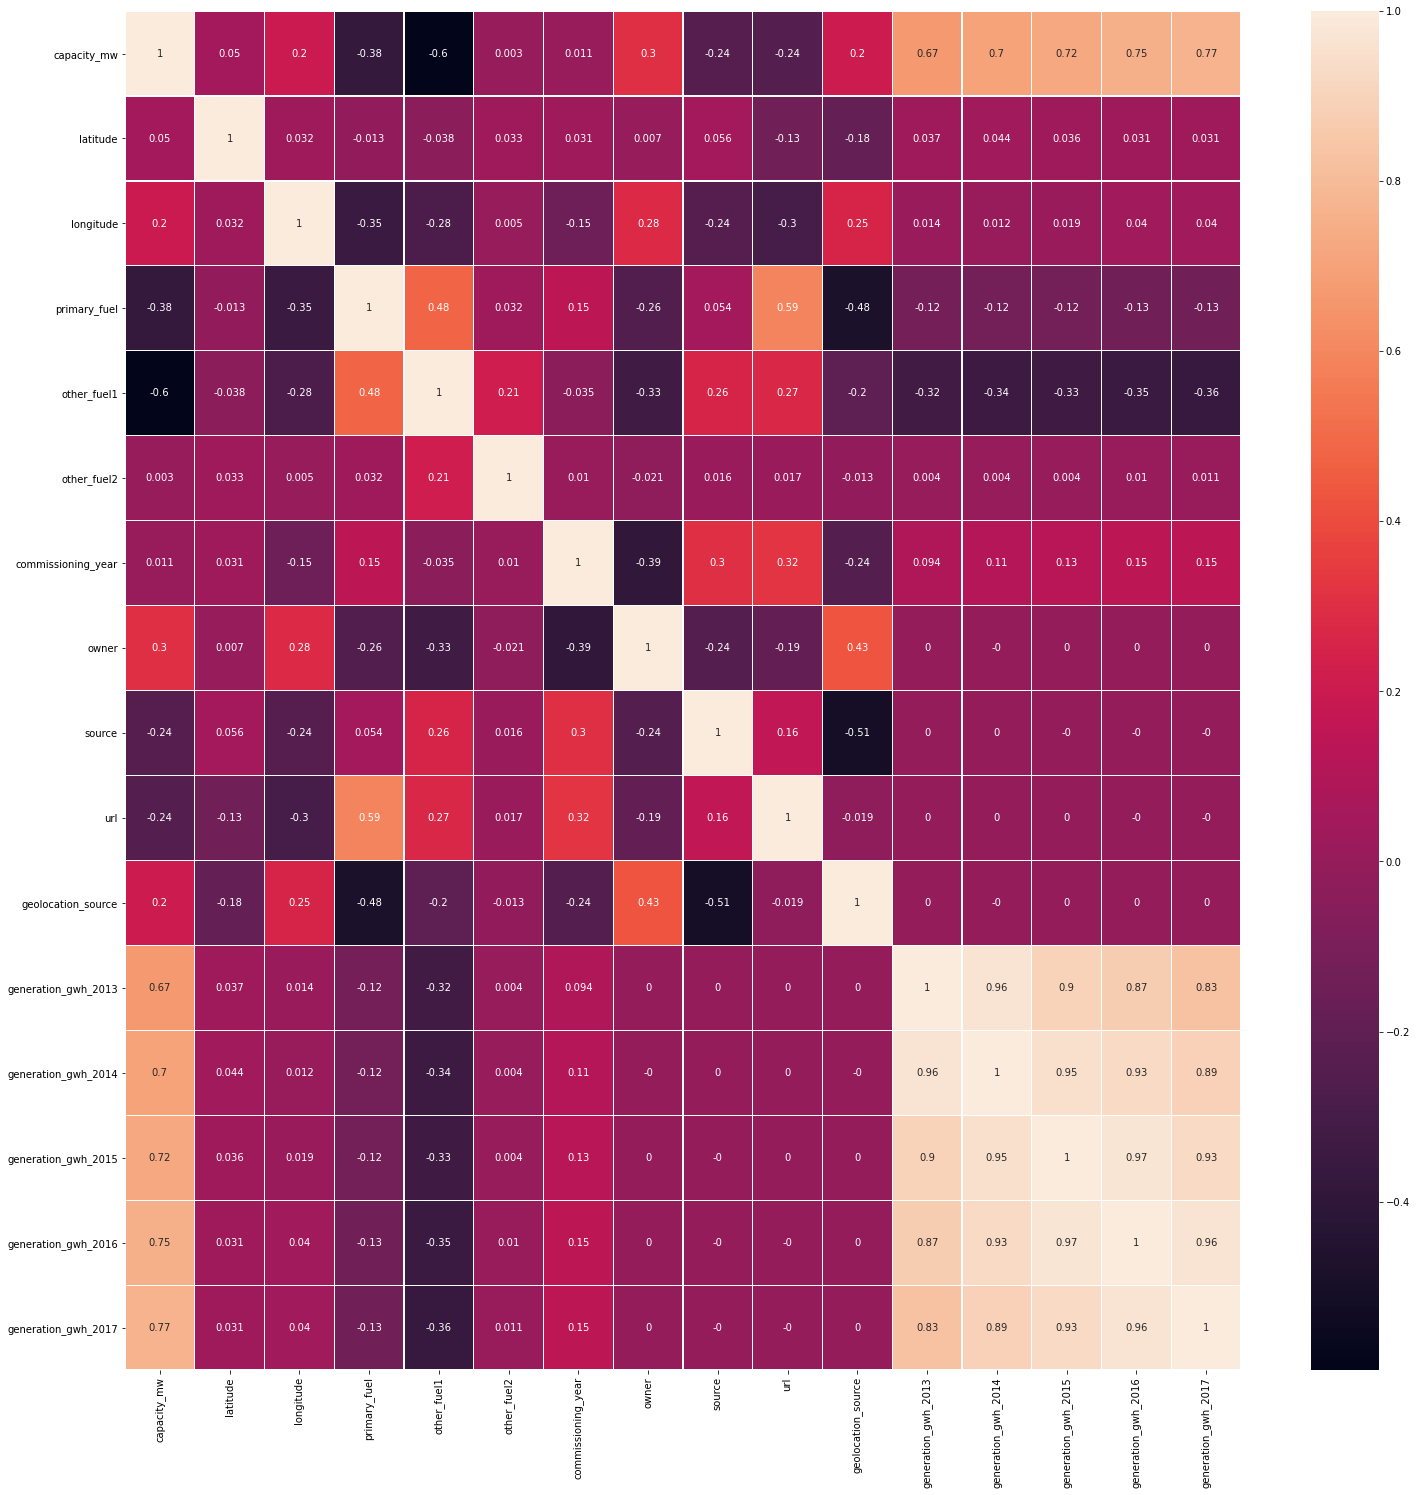

In [48]:
plt.subplots(figsize=(25,25))
sns.heatmap(round(df.corr(),3),linewidth=0.2,annot=True)


    
1. There is presence of multi-colinearity across multiple features. 


2. generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016 and generation_gwh_2017 have high co-linearity between eachother. 


3. owner,source, url and geolocation_scource have 0 co-linearity with generation_gwh.

In [49]:
df.describe()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.447848,3.205947,2.776432,0.998899,57.679515,227.534141,43.823789,94.429515,1.733480,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
std,580.221767,6.088110,4.781201,2.281339,0.429886,0.033186,15.011342,83.895877,44.624092,70.352824,0.676835,2465.930970,2665.360236,2860.146282,2878.730064,2923.041411
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.837500,17.057825,74.390250,1.000000,3.000000,1.000000,51.000000,188.750000,22.000000,58.000000,2.000000,1332.538825,1175.264825,874.205000,826.629750,852.438887
50%,60.000000,21.278850,76.978950,3.000000,3.000000,1.000000,67.000000,280.000000,22.000000,58.000000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
75%,388.125000,25.183775,79.211600,6.000000,3.000000,1.000000,67.000000,280.000000,29.250000,115.250000,2.000000,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
max,4760.000000,34.649000,95.408000,7.000000,3.000000,1.000000,72.000000,280.000000,190.000000,303.000000,2.000000,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000



    
Data is not normally distributed.

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          908 non-null    float64
 1   latitude             908 non-null    float64
 2   longitude            908 non-null    float64
 3   primary_fuel         908 non-null    int32  
 4   other_fuel1          908 non-null    int32  
 5   other_fuel2          908 non-null    int32  
 6   commissioning_year   908 non-null    int64  
 7   owner                908 non-null    int32  
 8   source               908 non-null    int32  
 9   url                  908 non-null    int32  
 10  geolocation_source   908 non-null    int32  
 11  generation_gwh_2013  908 non-null    float64
 12  generation_gwh_2014  908 non-null    float64
 13  generation_gwh_2015  908 non-null    float64
 14  generation_gwh_2016  908 non-null    float64
 15  generation_gwh_2017  908 non-null    flo


    
No null values present across the dataset.

# Checking for outliers and skewness

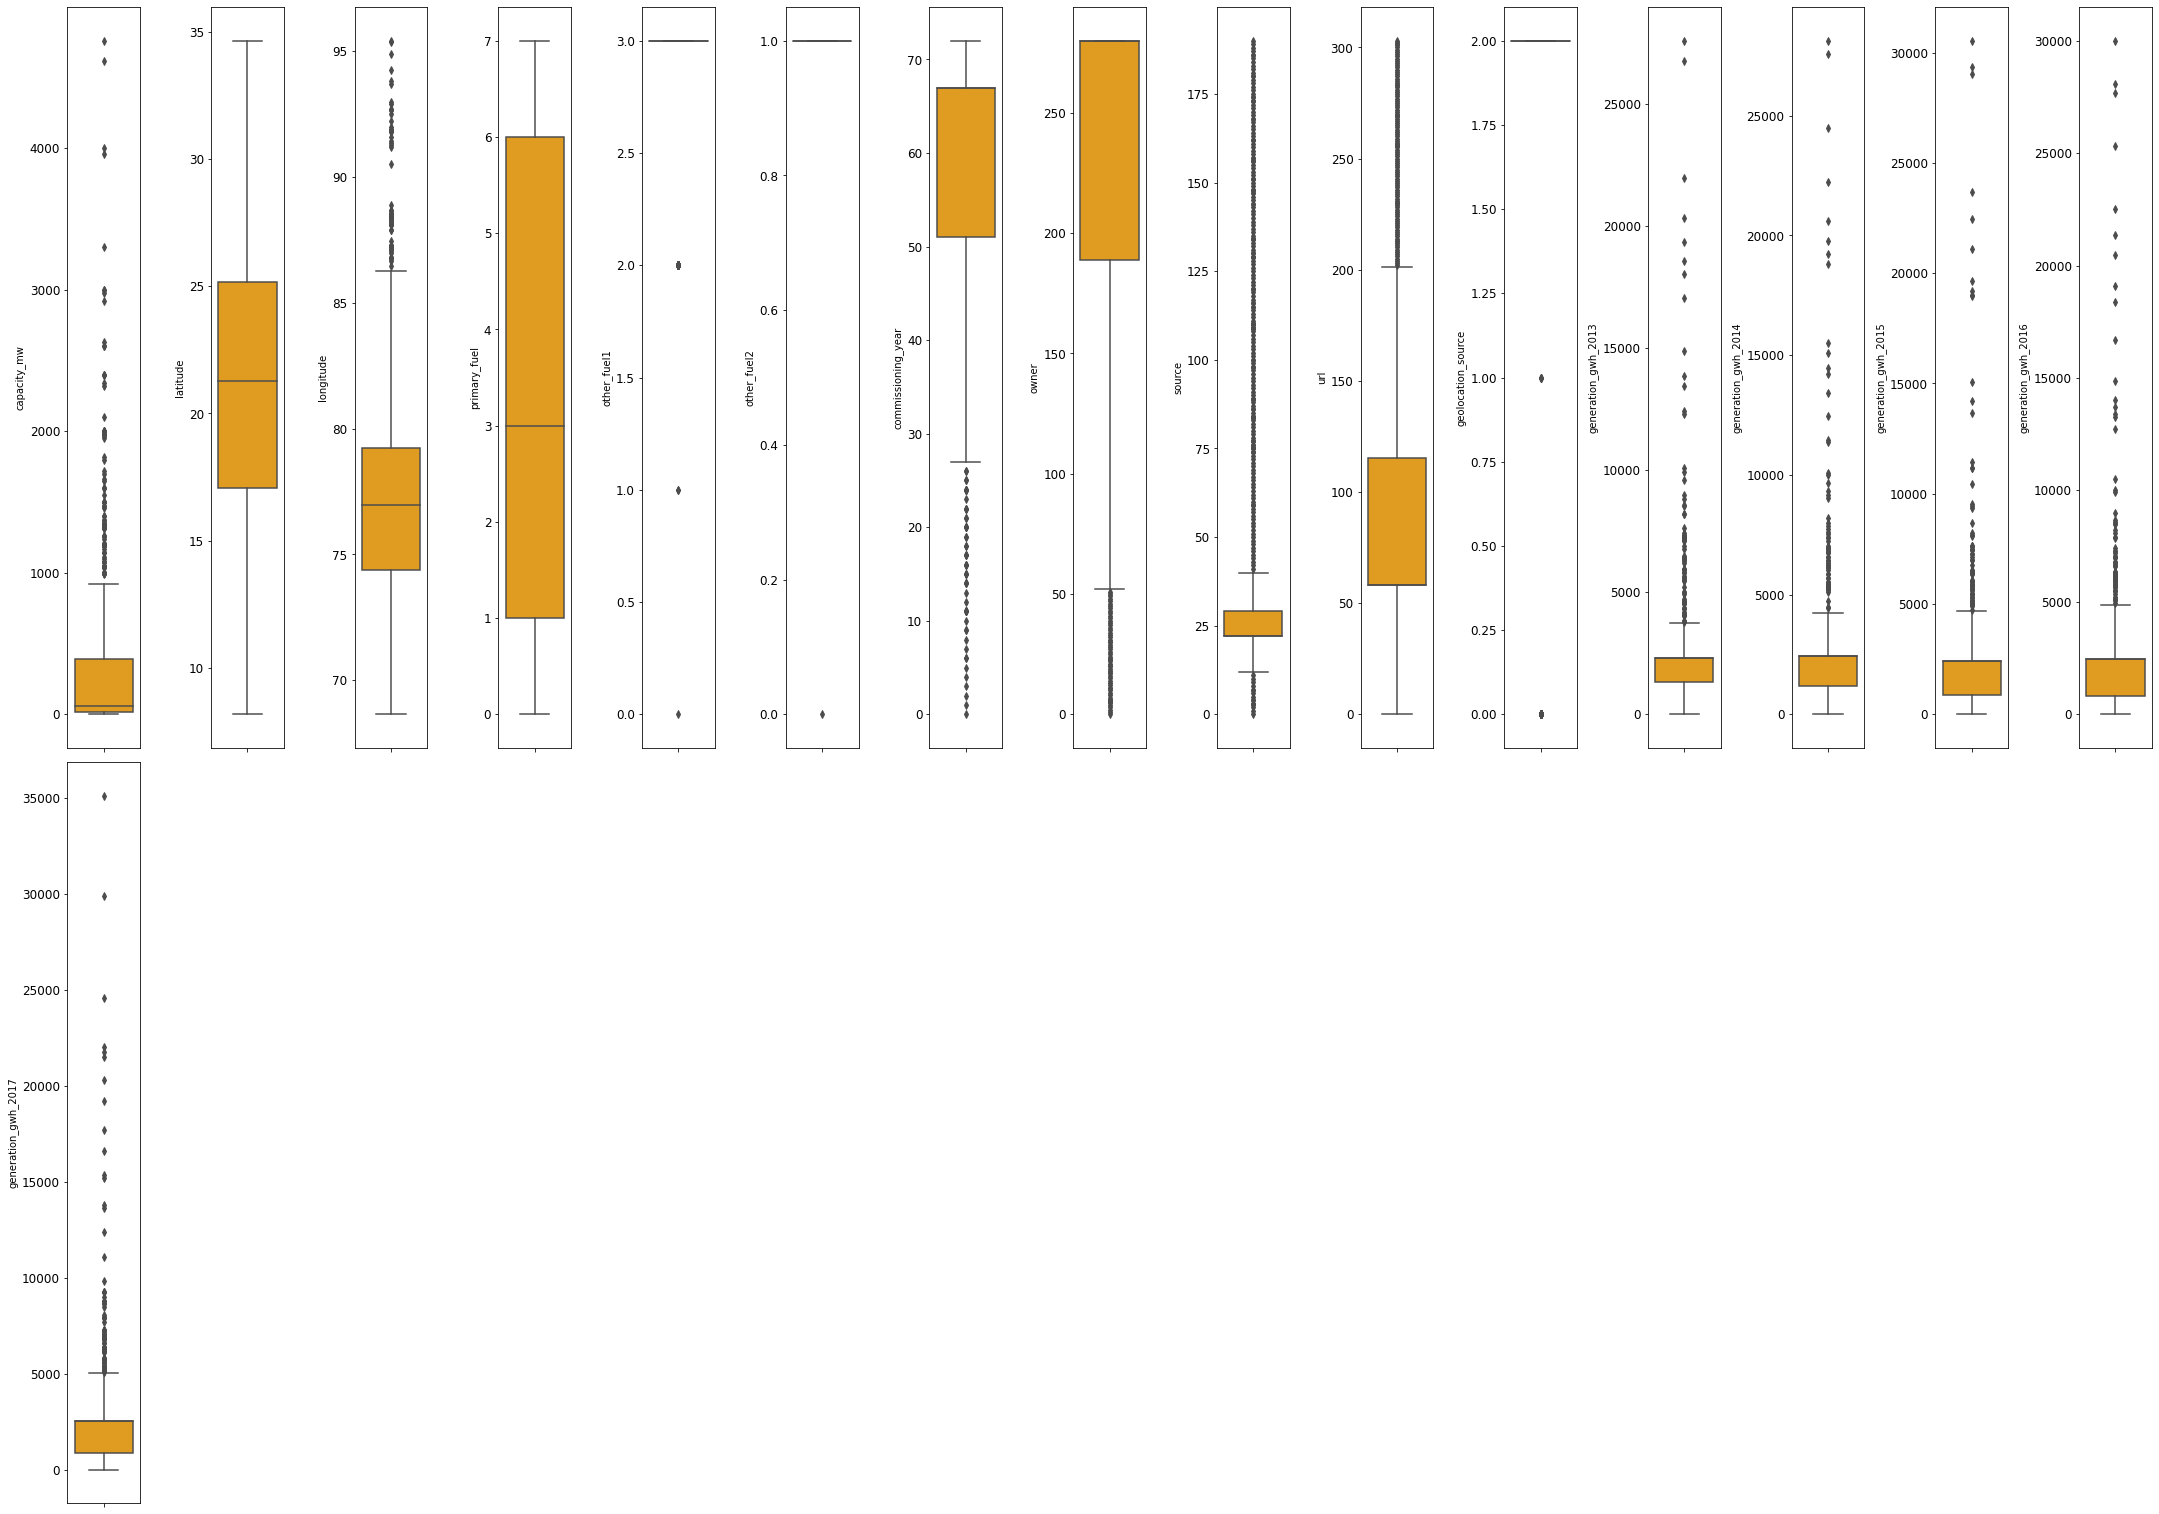

In [51]:
collist=df.columns.values
ncol=15 #no.of columns and rows to display the graphs i.e max col and max row
nrows=10
plt.figure(figsize=(2*ncol,7*ncol))
for i in range (0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y=df[collist[i]],color="orange",orient="v")
    plt.tight_layout()
    plt.yticks(fontsize=12)

In [52]:
df.skew()

capacity_mw             3.193257
latitude               -0.147391
longitude               1.129836
primary_fuel            0.471141
other_fuel1            -1.619441
other_fuel2           -30.133038
commissioning_year     -1.680860
owner                  -1.375607
source                  1.829145
url                     1.512258
geolocation_source     -2.161710
generation_gwh_2013     5.241491
generation_gwh_2014     5.041961
generation_gwh_2015     5.367370
generation_gwh_2016     5.071758
generation_gwh_2017     5.111938
dtype: float64


    
features have outliers and are skewed.

In [53]:
df_c=df

# Regression model

# Data Cleaning 

In [54]:
df=df.drop(["other_fuel2"],axis=1) #correlation is very low

In [55]:
x=df.drop(["capacity_mw"],axis=1)
y=df["capacity_mw"]
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def c_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [56]:
c_vif(x)

,variables,VIF
0,latitude,13.754747
1,longitude,106.328878
2,primary_fuel,13.247617
3,other_fuel1,73.397958
4,commissioning_year,21.610813
5,owner,13.812807
6,source,4.633994
7,url,7.864593
8,geolocation_source,28.148681
9,generation_gwh_2013,29.460796


In [57]:
df["diff"]=(df["generation_gwh_2014"]-df["generation_gwh_2015"]-df["generation_gwh_2016"]-df["longitude"])**2
df=df.drop(["generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","longitude"],axis=1)

In [58]:
x=df.drop(["capacity_mw"],axis=1)
y=df["capacity_mw"]
c_vif(x)

,variables,VIF
0,latitude,12.770254
1,primary_fuel,13.242689
2,other_fuel1,49.483167
3,commissioning_year,16.495322
4,owner,11.042380
5,source,4.631342
6,url,7.589263
7,geolocation_source,27.179523
8,generation_gwh_2013,6.265863
9,generation_gwh_2017,10.927173


In [59]:
df["new_col"]=(df["other_fuel1"]+df["geolocation_source"])**2

In [60]:
df=df.drop(["other_fuel1","geolocation_source"],axis=1)

In [61]:
x=df.drop(["capacity_mw"],axis=1)
y=df["capacity_mw"]
c_vif(x)

,variables,VIF
0,latitude,11.584095
1,primary_fuel,4.779750
2,commissioning_year,14.537307
3,owner,8.084959
4,source,2.344551
5,url,5.485217
6,generation_gwh_2013,6.258145
7,generation_gwh_2017,10.931727
8,diff,3.102304
9,new_col,11.650691



    
It can be noted that the vif value hs come down drastically.

In [62]:
#removing outliers
import scipy 
from scipy.stats import zscore 
z=np.abs(zscore(df))  #removes outliers
z.shape

(908, 11)

In [63]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(908, 11)
(852, 11)


In [64]:
#data loss 
(908-852)/908*100

6.167400881057269

data loss is less than 10% we can proceed.

In [65]:
Q1= df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
IQR

capacity_mw            3.712875e+02
latitude               8.125950e+00
primary_fuel           5.000000e+00
commissioning_year     1.600000e+01
owner                  9.125000e+01
source                 7.250000e+00
url                    5.725000e+01
generation_gwh_2013    9.715204e+02
generation_gwh_2017    1.679316e+03
diff                   5.398047e+06
new_col                9.000000e+00
dtype: float64

In [66]:
df_new1=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df_new1.shape

(367, 11)

 data loss here is higher we can proceed with  zscore method

In [67]:
x=df_new.drop(["capacity_mw"],axis=1)
y=df_new["capacity_mw"]

# Preprocessing 

In [68]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x=ms.fit_transform(x)
x

array([[0.75585062, 0.85714286, 0.88135593, ..., 0.25745722, 0.0286251 ,
        0.57142857],
       [0.62678766, 0.14285714, 0.91525424, ..., 0.25745722, 0.02865619,
        1.        ],
       [0.51868762, 1.        , 0.91525424, ..., 0.25745722, 0.02853733,
        1.        ],
       ...,
       [0.26838645, 1.        , 0.91525424, ..., 0.25745722, 0.02867829,
        1.        ],
       [0.61106642, 0.14285714, 0.91525424, ..., 0.25745722, 0.02863662,
        1.        ],
       [0.06667271, 1.        , 0.91525424, ..., 0.25745722, 0.0287214 ,
        1.        ]])

# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [70]:
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print("At random state=",i,'training accuracy =',r2_score(y_train,pred_train))
    print("At random state=",i,'testing accuracy =',r2_score(y_test,pred_test))
    print("\n")

At random state= 0 training accuracy = 0.6429094723684744
At random state= 0 testing accuracy = 0.635136096015783


At random state= 1 training accuracy = 0.6324707220977448
At random state= 1 testing accuracy = 0.6940190834557862


At random state= 2 training accuracy = 0.6567674569986703
At random state= 2 testing accuracy = 0.5849528102204535


At random state= 3 training accuracy = 0.6513808924382496
At random state= 3 testing accuracy = 0.608330289653354


At random state= 4 training accuracy = 0.6336829789104279
At random state= 4 testing accuracy = 0.6748743804949544


At random state= 5 training accuracy = 0.6487119039730425
At random state= 5 testing accuracy = 0.6083789846484716


At random state= 6 training accuracy = 0.6258107475933512
At random state= 6 testing accuracy = 0.7144556070364665


At random state= 7 training accuracy = 0.64926214349234
At random state= 7 testing accuracy = 0.6190292143171889


At random state= 8 training accuracy = 0.6530153025264347
At random 

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# XGBRegressor

In [72]:
from xgboost import XGBRegressor

In [73]:
xgbr=XGBRegressor()
xgbr.fit(x_train,y_train)
xgbr_pred=xgbr.predict(x_test)
r2_score(y_test,xgbr_pred)

0.7642560580161909

In [74]:
for i in range(2,11):
    lr_cv=cross_val_score(xgbr,x,y,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = 69.50619015127724 at cv = 2
Score = 74.01643385525887 at cv = 3
Score = 72.5143052737986 at cv = 4
Score = 70.62798298271827 at cv = 5
Score = 71.51315359689369 at cv = 6
Score = 71.30464015358534 at cv = 7
Score = 73.11594199600822 at cv = 8
Score = 70.6840643126565 at cv = 9
Score = 70.66631928827928 at cv = 10


# Ensemble

In [75]:
from sklearn.ensemble import AdaBoostRegressor 
Ad=AdaBoostRegressor()
Ad.fit(x_train,y_train)
Ad.score(x_train,y_train)
pred_ad=Ad.predict(x_test)
r2_ad=r2_score(y_test,pred_ad)
r2_ad

0.7002289902383585

In [76]:
for i in range(2,11):
    lr_cv=cross_val_score(Ad,x,y,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = 51.72356384056105 at cv = 2
Score = 60.47585849836569 at cv = 3
Score = 60.193622180961334 at cv = 4
Score = 62.06227013490334 at cv = 5
Score = 60.505196089939176 at cv = 6
Score = 59.72583756907993 at cv = 7
Score = 60.618436587490656 at cv = 8
Score = 60.844585913765606 at cv = 9
Score = 62.07097982397547 at cv = 10


In [77]:
lr_cv=cross_val_score(Ad,x,y,cv=5)
lrs=lr_cv.mean()
print("CV Score =",lrs*100)
print("Accuracy_score =",r2_score(y_test,pred_ad)*100)

CV Score = 61.31181928597653
Accuracy_score = 70.02289902383585


# Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)
y_pred_rf = regressor_rf.predict(x_test)
rf_r2=r2_score(y_test,y_pred_rf)
rf_r2

0.7844192987470631

In [79]:
for i in range(2,11):
    lr_cv=cross_val_score(regressor_rf,x,y,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = 73.973666092121 at cv = 2
Score = 78.23864556136662 at cv = 3
Score = 77.30848308437552 at cv = 4
Score = 77.26374801693493 at cv = 5
Score = 77.04920756709235 at cv = 6
Score = 76.46370593894204 at cv = 7
Score = 77.59303091924814 at cv = 8
Score = 76.27561129675418 at cv = 9
Score = 75.69506988478452 at cv = 10


In [80]:
lr_cv=cross_val_score(regressor_rf,x,y,cv=3)
lrs=lr_cv.mean()
print("Score =",lrs*100)
print("Accuracy_score =",r2_score(y_test,y_pred_rf)*100)

Score = 78.22513801245546
Accuracy_score = 78.4419298747063


# Lasso

In [81]:
from sklearn.linear_model import Lasso
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss

0.6350111481191258

In [82]:
for i in range(2,11):
    lr_cv=cross_val_score(ls,x,y,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = 60.55043171739629 at cv = 2
Score = 61.65151620576287 at cv = 3
Score = 61.72984625998941 at cv = 4
Score = 62.25266739618025 at cv = 5
Score = 62.58710538322666 at cv = 6
Score = 61.1988307979547 at cv = 7
Score = 62.754625262754814 at cv = 8
Score = 61.07952924801728 at cv = 9
Score = 59.42474398831508 at cv = 10


In [83]:
lr_cv=cross_val_score(ls,x,y,cv=6)
lrs=lr_cv.mean()
print("CV Score =",lrs*100)
print("Accuracy_score =",r2_score(y_test,pred_ls)*100)

CV Score = 62.58710538322666
Accuracy_score = 63.501114811912586


# DecisionTree Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
r2_dt=r2_score(pred_dt,y_test)
r2_dt

0.656714508081327

In [85]:
for i in range(2,11):
    lr_cv=cross_val_score(dt,x,y,cv=i)
    lrs=lr_cv.mean()
    print("Score =",lrs*100,"at cv =",i)

Score = 53.19155129376752 at cv = 2
Score = 61.797099520673946 at cv = 3
Score = 61.16410927681868 at cv = 4
Score = 61.228631933466126 at cv = 5
Score = 62.141017158658016 at cv = 6
Score = 58.81054978268053 at cv = 7
Score = 61.98647976850133 at cv = 8
Score = 59.53761199189083 at cv = 9
Score = 59.51658561592289 at cv = 10


In [86]:
lr_cv=cross_val_score(dt,x,y,cv=5)
lrs=lr_cv.mean()
print("CV Score =",lrs*100)
print("Accuracy_score =",r2_score(pred_dt,y_test)*100)

CV Score = 61.32293706370493
Accuracy_score = 65.6714508081327


# Hyper paramter Tuning 

In [87]:
from sklearn.model_selection import GridSearchCV
param={"n_estimators":[100,150,200],"criterion":["squared_error","mse","absolute_error","poisson"],"max_features":["auto","sqrt","log2"],"oob_score":[True,False]}
clf = GridSearchCV(RandomForestRegressor(),param_grid=param)

In [88]:
regressor_rf = RandomForestRegressor(n_estimators=100,criterion="mse",max_features="log2",oob_score=True)
regressor_rf.fit(x_train, y_train)
y_pred_rf = regressor_rf.predict(x_test)
rf_r2=r2_score(y_test,y_pred_rf)
rf_r2

0.7979051779843251

In [89]:
lr_cv=cross_val_score(regressor_rf,x,y,cv=6)
lrs=lr_cv.mean()
print("CV Score =",lrs*100)
print("Accuracy_score =",r2_score(y_test,y_pred_rf)*100)

CV Score = 79.25981810186249
Accuracy_score = 79.79051779843252


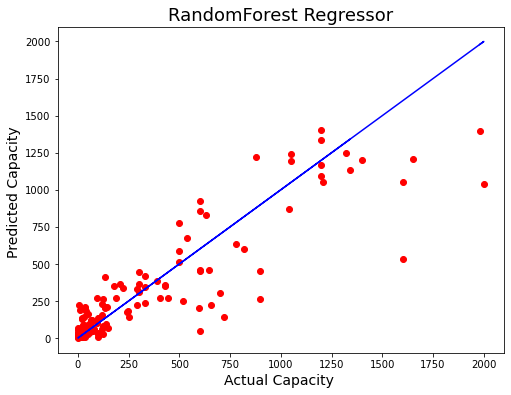

In [90]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=y_pred_rf,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual Capacity ",fontsize=14)
plt.ylabel("Predicted Capacity ",fontsize=14)
plt.title("RandomForest Regressor",fontsize=18)
plt.show()

# Model Saving 

In [91]:
import pickle 
filename= "power_r.pkl"
pickle.dump(regressor_rf, open(filename,"wb"))

# Classification model

# Data cleaning

In [92]:
df_c

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
0,2.5,28.1839,73.2407,6,3,1,65,229,109,128,1,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
1,98.0,24.7663,74.6090,1,3,1,67,258,174,173,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
2,39.2,21.9038,69.3732,7,3,1,67,2,21,205,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
3,135.0,23.8712,91.3602,2,3,1,58,280,22,58,2,631.777928,617.789264,843.747000,886.004428,663.774500
4,1800.0,21.9603,82.4091,1,2,1,69,280,22,58,2,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,1600.0,16.2949,77.3568,1,2,1,70,280,22,58,2,2304.059202,2420.393316,0.994875,233.596650,865.400000
904,3.0,12.8932,78.1654,6,3,1,67,114,77,22,0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
905,25.5,15.2758,75.5811,7,3,1,67,280,21,260,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458
906,80.0,24.3500,73.7477,1,3,1,67,91,59,82,2,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458


In [93]:
x=df_c.drop(["primary_fuel"],axis=1)
y=df_c["primary_fuel"]
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def c_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return(vif)

In [94]:
c_vif(x)

,variables,VIF
0,capacity_mw,6.100041
1,latitude,13.997661
2,longitude,253.516903
3,other_fuel1,81.739529
4,other_fuel2,398.633198
5,commissioning_year,23.691719
6,owner,14.572976
7,source,3.094929
8,url,4.074409
9,geolocation_source,12.624028


In [95]:
df_c["diff"]=(df_c["longitude"]-df_c["other_fuel2"])**2
df_c=df_c.drop(["longitude","other_fuel2"],axis=1)
x_c=df_c.drop(["primary_fuel"],axis=1)
y_c=df_c["primary_fuel"]
c_vif(x_c)

,variables,VIF
0,capacity_mw,5.956876
1,latitude,13.387524
2,other_fuel1,38.080062
3,commissioning_year,19.750484
4,owner,13.531403
5,source,3.098921
6,url,4.083700
7,geolocation_source,12.344751
8,generation_gwh_2013,29.489453
9,generation_gwh_2014,62.213140


In [96]:
round(df_c.corr(),3)

,capacity_mw,latitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,diff
capacity_mw,1.000,0.050,-0.378,-0.598,0.011,0.304,-0.242,-0.243,0.205,0.668,0.705,0.722,0.753,0.767,0.192
latitude,0.050,1.000,-0.013,-0.038,0.031,0.007,0.056,-0.131,-0.184,0.037,0.044,0.036,0.031,0.031,0.043
primary_fuel,-0.378,-0.013,1.000,0.478,0.147,-0.260,0.054,0.589,-0.483,-0.121,-0.125,-0.125,-0.131,-0.132,-0.338
other_fuel1,-0.598,-0.038,0.478,1.000,-0.035,-0.326,0.255,0.270,-0.205,-0.322,-0.337,-0.333,-0.350,-0.362,-0.274
commissioning_year,0.011,0.031,0.147,-0.035,1.000,-0.389,0.304,0.322,-0.245,0.094,0.114,0.128,0.148,0.148,-0.143
owner,0.304,0.007,-0.260,-0.326,-0.389,1.000,-0.244,-0.191,0.427,0.000,-0.000,0.000,0.000,0.000,0.275
source,-0.242,0.056,0.054,0.255,0.304,-0.244,1.000,0.160,-0.506,0.000,0.000,-0.000,-0.000,-0.000,-0.235
url,-0.243,-0.131,0.589,0.270,0.322,-0.191,0.160,1.000,-0.019,0.000,0.000,0.000,-0.000,-0.000,-0.297
geolocation_source,0.205,-0.184,-0.483,-0.205,-0.245,0.427,-0.506,-0.019,1.000,0.000,-0.000,0.000,0.000,0.000,0.243
generation_gwh_2013,0.668,0.037,-0.121,-0.322,0.094,0.000,0.000,0.000,0.000,1.000,0.963,0.896,0.874,0.831,0.014


In [97]:
df_c["diff_2"]=(df_c["generation_gwh_2014"]-df_c["generation_gwh_2015"]-df_c["generation_gwh_2016"]-df_c["diff"]-df_c["other_fuel1"])**2
df_c=df_c.drop(["generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","diff","other_fuel1"],axis=1)
x_c=df_c.drop(["primary_fuel"],axis=1)
y_c=df_c["primary_fuel"]
c_vif(x_c)

,variables,VIF
0,capacity_mw,4.986108
1,latitude,10.602623
2,commissioning_year,14.228797
3,owner,11.111764
4,source,2.994594
5,url,3.804157
6,geolocation_source,10.278292
7,generation_gwh_2013,6.330659
8,generation_gwh_2017,16.400175
9,diff_2,6.127176


In [98]:
#removing outliers
import scipy 
from scipy.stats import zscore 
z=np.abs(zscore(df_c))  #removes outliers
z.shape

(908, 11)

In [99]:
threshold=3
df_new_c=df_c[(z<3).all(axis=1)]
print(df_c.shape)
print(df_new_c.shape)

(908, 11)
(852, 11)


In [100]:
#data loss
(908-852)/908*100

6.167400881057269

Since the data loss is less than 10% we can proceed

In [101]:
x_c=df_new_c.drop(["primary_fuel"],axis=1)
y_c=df_new_c["primary_fuel"]

# Preprocessing

In [102]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
x_c=ms.fit_transform(x_c)
x_c

array([[0.00125   , 0.75585062, 0.88135593, ..., 0.25698899, 0.25745722,
        0.11249222],
       [0.049     , 0.62678766, 0.91525424, ..., 0.25698899, 0.25745722,
        0.11962681],
       [0.0196    , 0.51868762, 0.91525424, ..., 0.25698899, 0.25745722,
        0.09398039],
       ...,
       [0.01275   , 0.26838645, 0.91525424, ..., 0.25698899, 0.25745722,
        0.12489076],
       [0.04      , 0.61106642, 0.91525424, ..., 0.25698899, 0.25745722,
        0.11509888],
       [0.00825   , 0.06667271, 0.91525424, ..., 0.25698899, 0.25745722,
        0.13563827]])

# SMOTE

In [103]:
y_c.value_counts()

1    233
3    231
7    123
6    122
2     68
0     45
5     21
4      9
Name: primary_fuel, dtype: int64

In [104]:
from imblearn.over_sampling import SMOTE 
smt=SMOTE()
trainx,trainy=smt.fit_resample(x_c,y_c)

In [105]:
trainy.value_counts()

0    233
1    233
2    233
3    233
4    233
5    233
6    233
7    233
Name: primary_fuel, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
x_train_c,x_test_c,y_train_c,y_test_c=train_test_split(trainx,trainy,test_size=0.2)

# Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,confusion_matrix

In [109]:
lr=LogisticRegression(max_iter=200)
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    
    pred_test_lr=lr.predict(x_test)
    
    print("At random state=",i,'testing accuracy =',accuracy_score(y_test,pred_test_lr))
    print("\n")

At random state= 0 testing accuracy = 0.646112600536193


At random state= 1 testing accuracy = 0.6648793565683646


At random state= 2 testing accuracy = 0.6729222520107239


At random state= 3 testing accuracy = 0.6729222520107239


At random state= 4 testing accuracy = 0.7024128686327078


At random state= 5 testing accuracy = 0.6970509383378016


At random state= 6 testing accuracy = 0.6595174262734584


At random state= 7 testing accuracy = 0.6809651474530831


At random state= 8 testing accuracy = 0.646112600536193


At random state= 9 testing accuracy = 0.6380697050938338


At random state= 10 testing accuracy = 0.6997319034852547


At random state= 11 testing accuracy = 0.6729222520107239


At random state= 12 testing accuracy = 0.6943699731903485


At random state= 13 testing accuracy = 0.6541554959785523


At random state= 14 testing accuracy = 0.6729222520107239


At random state= 15 testing accuracy = 0.6970509383378016


At random state= 16 testing accuracy = 0.72922252010

In [110]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=0.2,random_state=45)
lr.fit(x_train,y_train)
    
pred_test_lr=lr.predict(x_test)
    
print('testing accuracy =',accuracy_score(y_test,pred_test_lr))

testing accuracy = 0.7265415549597856


# DecisionTree Classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score 

In [112]:
dt=DecisionTreeClassifier()
dt.fit(x_train_c,y_train_c)

pred_test=dt.predict(x_test_c)
acc_test=accuracy_score(pred_test,y_test_c)

print("acc_test =",acc_test)

acc_test = 0.8954423592493298


In [113]:
for i in range(2,10):
    rf_cv=cross_val_score(dt,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 86.23348017621146 at cv = 2
Score = 87.22342432918788 at cv = 3
Score = 87.22466960352423 at cv = 4
Score = 86.67840446845972 at cv = 5
Score = 86.89656674799582 at cv = 6
Score = 86.78848283499445 at cv = 7
Score = 86.5616752057134 at cv = 8
Score = 87.003300330033 at cv = 9


In [114]:
rf_cv=cross_val_score(dt,x,y,cv=3)
rfs=rf_cv.mean()
print("Cv Score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_test,y_test_c)*100)

Cv Score = 86.8926627762114
Accuracy_score = 89.54423592493298


# RandomForest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_c,y_train_c)

pred_test_rf=rf.predict(x_test_c)
acc_test=accuracy_score(pred_test_rf,y_test_c)

print("acc_test =",acc_test)

acc_test = 0.9302949061662198


In [116]:
for i in range(2,10):
    rf_cv=cross_val_score(rf,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)


Score = 87.99559471365639 at cv = 2
Score = 89.64840192628535 at cv = 3
Score = 89.64757709251101 at cv = 4
Score = 90.52941533604518 at cv = 5
Score = 90.08583130010456 at cv = 6
Score = 90.3117812420138 at cv = 7
Score = 90.30624126688403 at cv = 8
Score = 90.08910891089108 at cv = 9


In [117]:
rf_cv=cross_val_score(rf,x,y,cv=8)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_test_rf,y_test_c)*100)


CV Score = 90.19853283651608
Accuracy_score = 93.02949061662198


# SVC

In [118]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train_c,y_train_c)
y_pred_svc = svc.predict(x_test_c)
accuracy_score(y_test_c,y_pred_svc)

0.7774798927613941

In [119]:
for i in range(2,10):
    rf_cv=cross_val_score(svc,x,y,cv=i)
    rfs=rf_cv.mean()
    print("Score =",rfs*100,"at cv =",i)

Score = 45.81497797356828 at cv = 2
Score = 45.37589520541459 at cv = 3
Score = 44.713656387665196 at cv = 4
Score = 44.82727217533847 at cv = 5
Score = 44.50011618450098 at cv = 6
Score = 44.27293636595962 at cv = 7
Score = 44.2768979972054 at cv = 8
Score = 44.26952695269527 at cv = 9


In [120]:
rf_cv=cross_val_score(svc,x,y,cv=9)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(y_test_c,y_pred_svc)*100)

CV Score = 44.26952695269527
Accuracy_score = 77.7479892761394


# Hyper parameter tuning

In [121]:
from sklearn.model_selection import GridSearchCV
param = {"criterion":["gini","entropy"],"max_features":["auto","sqrt","log2"],"bootstrap":[True,False],"n_estimators":[50,100,150,200]}
clf = GridSearchCV(RandomForestClassifier(),param_grid=param)

In [122]:
clf.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [131]:
print(clf.best_params_)
print(clf.best_score_)

{'bootstrap': False, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50}
0.9148099930416824


In [132]:
rf=RandomForestClassifier(bootstrap=False,criterion="gini",max_features="auto",n_estimators=50)
rf.fit(x_train,y_train)

pred_test_rf=rf.predict(x_test)
acc_test=accuracy_score(pred_test_rf,y_test)

print("acc_test =",acc_test*100)

acc_test = 92.76139410187668


In [133]:
rf_cv=cross_val_score(rf,trainx,trainy,cv=4)
rfs=rf_cv.mean()
print("CV Score =",rfs*100)
print("Accuracy_score =",accuracy_score(pred_test_rf,y_test)*100)

CV Score = 91.79184549356223
Accuracy_score = 92.76139410187668


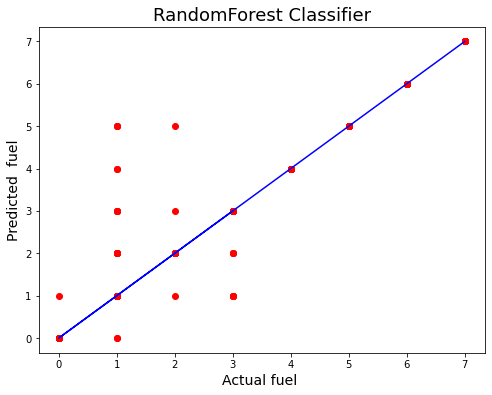

In [134]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test_rf,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual fuel ",fontsize=14)
plt.ylabel("Predicted  fuel",fontsize=14)
plt.title("RandomForest Classifier",fontsize=18)
plt.show()

# Model saving 

In [135]:
import pickle 
filename= "power_c.pkl"
pickle.dump(rf, open(filename,"wb"))

# Conclusion 

In [136]:
a=np.array(y_test)
predicted = np.array(rf.predict(x_test))
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index=range(len(a)))
df_com

,original,predicted
0,7,7
1,6,6
2,4,4
3,4,4
4,0,0
...,...,...
368,0,0
369,7,7
370,4,4
371,0,0
